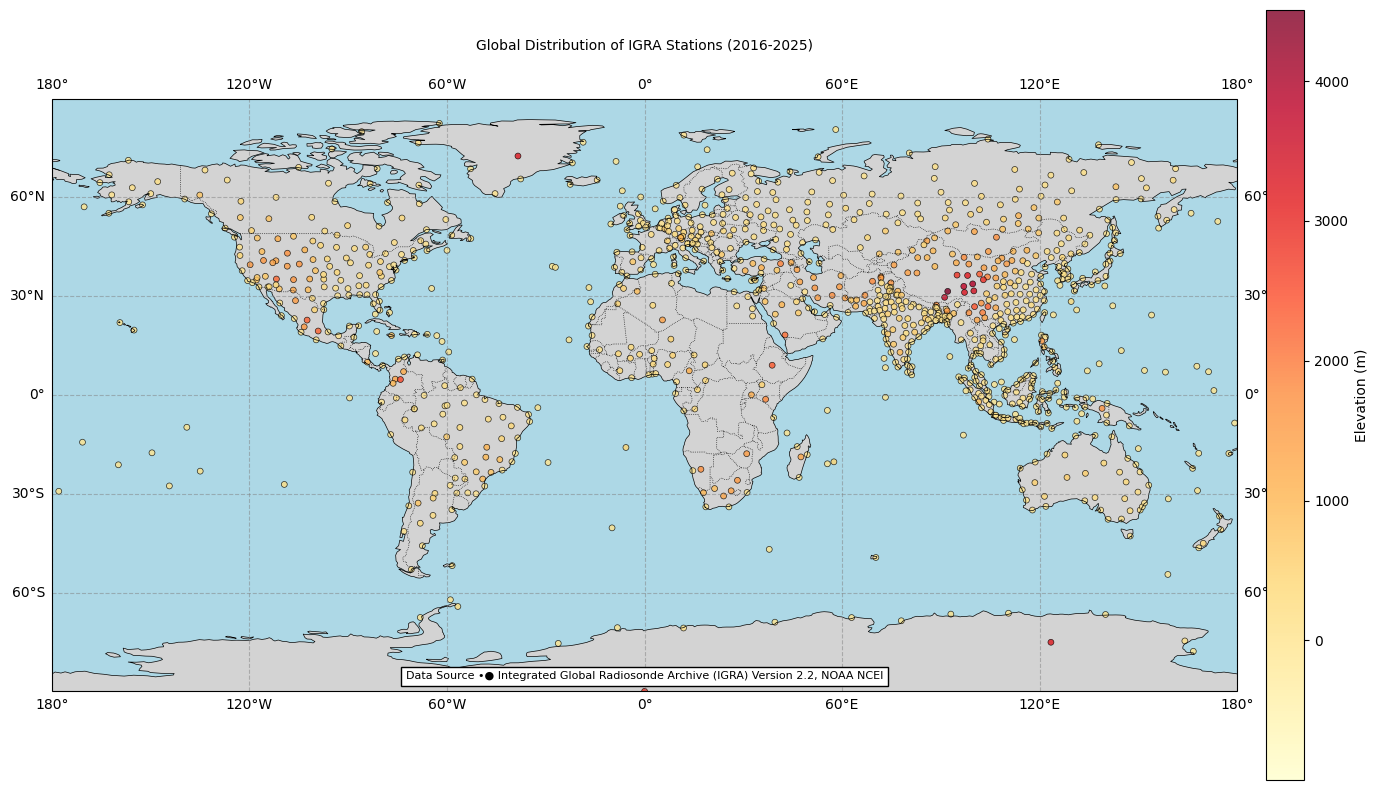

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

# Load the stations data
df = pd.read_csv('../data/recent_stations.csv')

# Create a figure with a PlateCarree projection
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)

# Plot stations
sc = ax.scatter(df['longitude'], df['latitude'], c=df['elevation'], s=18, cmap='YlOrRd',
                edgecolor='black', linewidth=0.5, alpha=0.8, transform=ccrs.PlateCarree())

# Add a colorbar for elevation
cbar = plt.colorbar(sc, ax=ax, orientation='vertical',
                    pad=0.02, label='Elevation (m)')
cbar.set_label('Elevation (m)', fontsize=10)

# # Annotate a few stations (limit to avoid clutter)
# for idx, row in df.head(5).iterrows():
#     ax.annotate(row['station_name'], (row['longitude'], row['latitude']),
#                 xytext=(5, 5), textcoords='offset points', fontsize=8,
#                 color='orange', transform=ccrs.PlateCarree())

# Set title and data source
plt.title('Global Distribution of IGRA Stations (2016-2025)',
          fontsize=10, pad=20, loc='center')
source_text = "Data Source •● Integrated Global Radiosonde Archive (IGRA) Version 2.2, NOAA NCEI"
at = AnchoredText(source_text, loc='lower center',
                  prop=dict(size=8), frameon=True)
ax.add_artist(at)

# Adjust layout and save
plt.tight_layout()
plt.savefig('igra_stations_map.png', dpi=300, bbox_inches='tight')
plt.show()

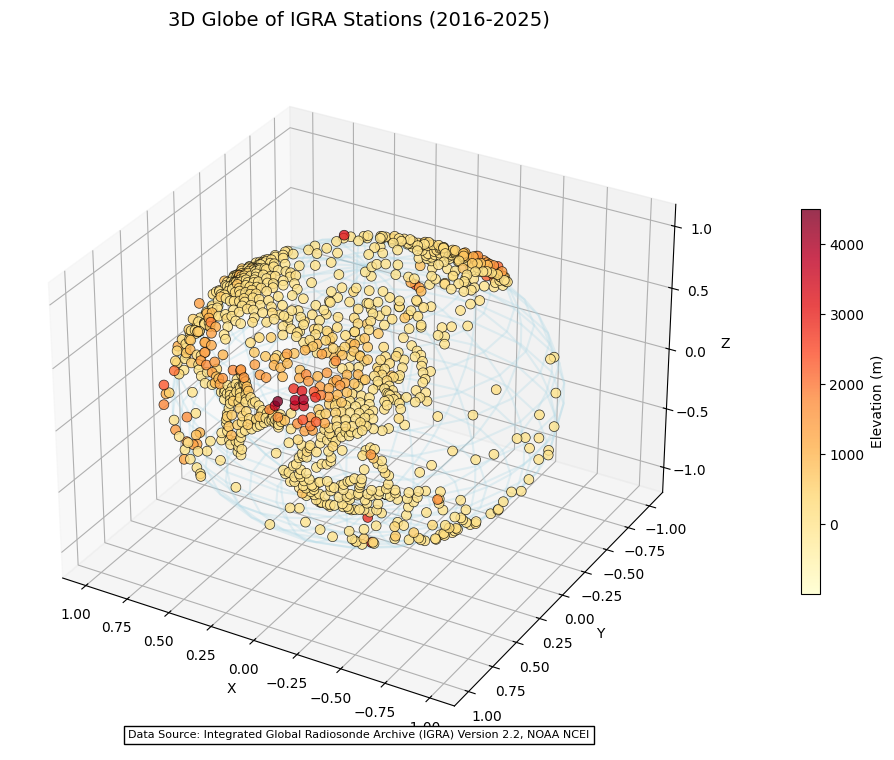

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import AnchoredText

# Load the stations data
df = pd.read_csv('../data/recent_stations.csv')

# Convert latitude and longitude to 3D coordinates on a sphere
R = 1  # Radius of the globe
lat = np.radians(df['latitude'])
lon = np.radians(df['longitude'])
# Normalize elevation for visualization (scale to make it visible on the globe)
# Scale elevation to 10% of globe radius
elev = df['elevation'] / df['elevation'].max() * 0.1
x = (R + elev) * np.cos(lat) * np.cos(lon)
y = (R + elev) * np.cos(lat) * np.sin(lon)
z = (R + elev) * np.sin(lat)

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the globe (wireframe sphere)
u = np.linspace(0, 2 * np.pi, 20)
v = np.linspace(0, np.pi, 20)
globe_x = R * np.outer(np.cos(u), np.sin(v))
globe_y = R * np.outer(np.sin(u), np.sin(v))
globe_z = R * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_wireframe(globe_x, globe_y, globe_z, color='lightblue', alpha=0.3)

# Plot stations
sc = ax.scatter(x, y, z, c=df['elevation'], s=50, cmap='YlOrRd',
                edgecolor='black', linewidth=0.5, alpha=0.8)

# Add a colorbar for elevation
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.1, shrink=0.5)
cbar.set_label('Elevation (m)', fontsize=10)

# Set axes labels
ax.set_xlabel('X', fontsize=10)
ax.set_ylabel('Y', fontsize=10)
ax.set_zlabel('Z', fontsize=10)

# Set title and data source
plt.title('3D Globe of IGRA Stations (2016-2025)', fontsize=14, pad=20)
source_text = "Data Source: Integrated Global Radiosonde Archive (IGRA) Version 2.2, NOAA NCEI"
at = AnchoredText(source_text, loc='lower center',
                  prop=dict(size=8), frameon=True)
ax.add_artist(at)

# Adjust view angle for better visualization
ax.view_init(elev=30, azim=120)

# Save the plot
plt.savefig('igra_stations_3d_globe.png', dpi=300, bbox_inches='tight')
plt.show()

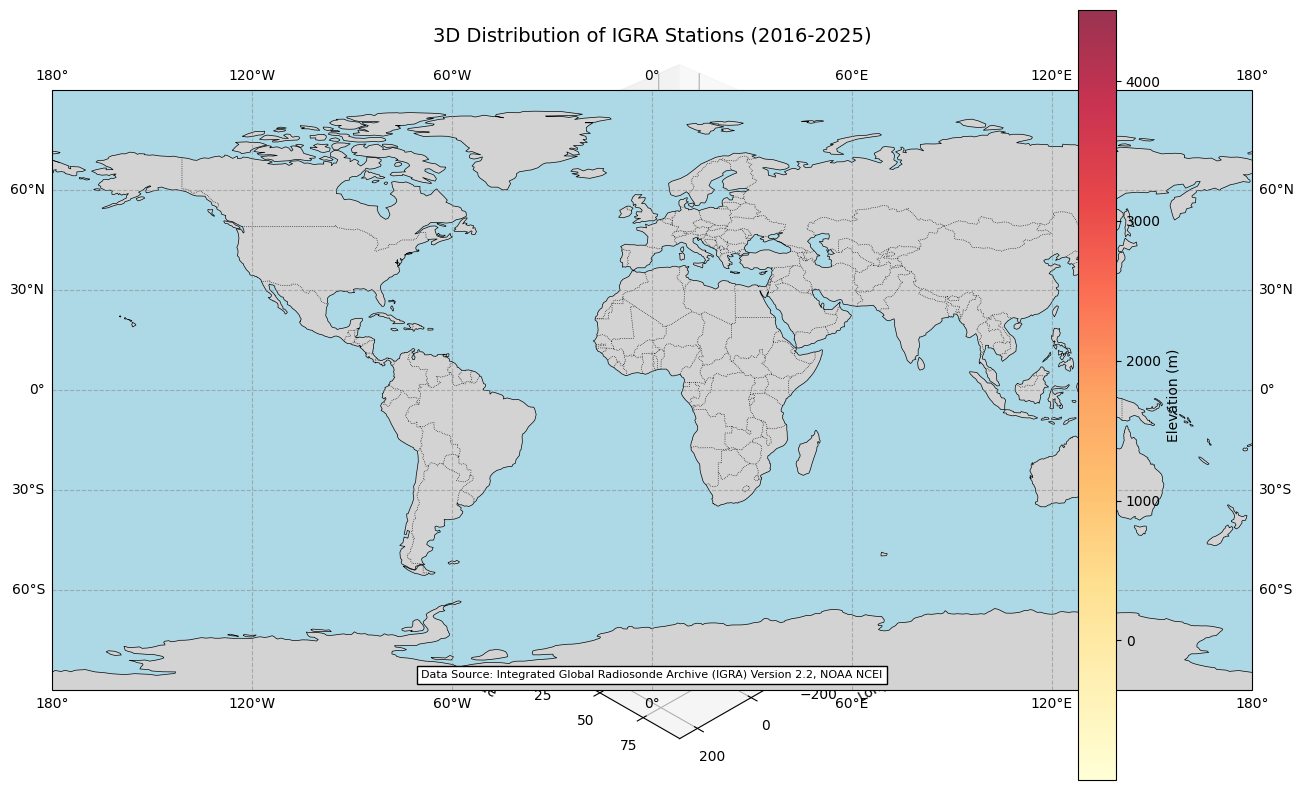

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

# Load the stations data
df = pd.read_csv('../data/recent_stations.csv')

# Create a figure with a PlateCarree projection for the base map
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a 2D map projection to overlay on the 3D plot
map_ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.PlateCarree())
map_ax.add_feature(cfeature.LAND, facecolor='lightgray')
map_ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
map_ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
map_ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
map_ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)

# Plot stations in 3D space (longitude=x, latitude=y, elevation=z)
sc = ax.scatter(df['longitude'], df['latitude'], df['elevation'],
                c=df['elevation'], s=50, cmap='YlOrRd', edgecolor='black',
                linewidth=0.5, alpha=0.8)

# Add a colorbar for elevation
cbar = fig.colorbar(sc, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Elevation (m)', fontsize=10)

# Set labels for the axes
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.set_zlabel('Elevation (m)', fontsize=10)

# Annotate a few stations (limit to avoid clutter)
for idx, row in df.head(5).iterrows():
    # Project the annotation in 3D space
    ax.text(row['longitude'], row['latitude'], row['elevation'],
            row['station_name'], fontsize=8, color='darkblue')

# Set title and data source
plt.title('3D Distribution of IGRA Stations (2016-2025)', fontsize=14, pad=20)
source_text = "Data Source: Integrated Global Radiosonde Archive (IGRA) Version 2.2, NOAA NCEI"
at = AnchoredText(source_text, loc='lower center',
                  prop=dict(size=8), frameon=True)
map_ax.add_artist(at)

# Adjust view angle for better visibility
ax.view_init(elev=30, azim=45)

# Save and show the plot
plt.savefig('igra_stations_3d_map.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\STUDENT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\STUDENT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\STUDENT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\STUDENT\AppData\Loc

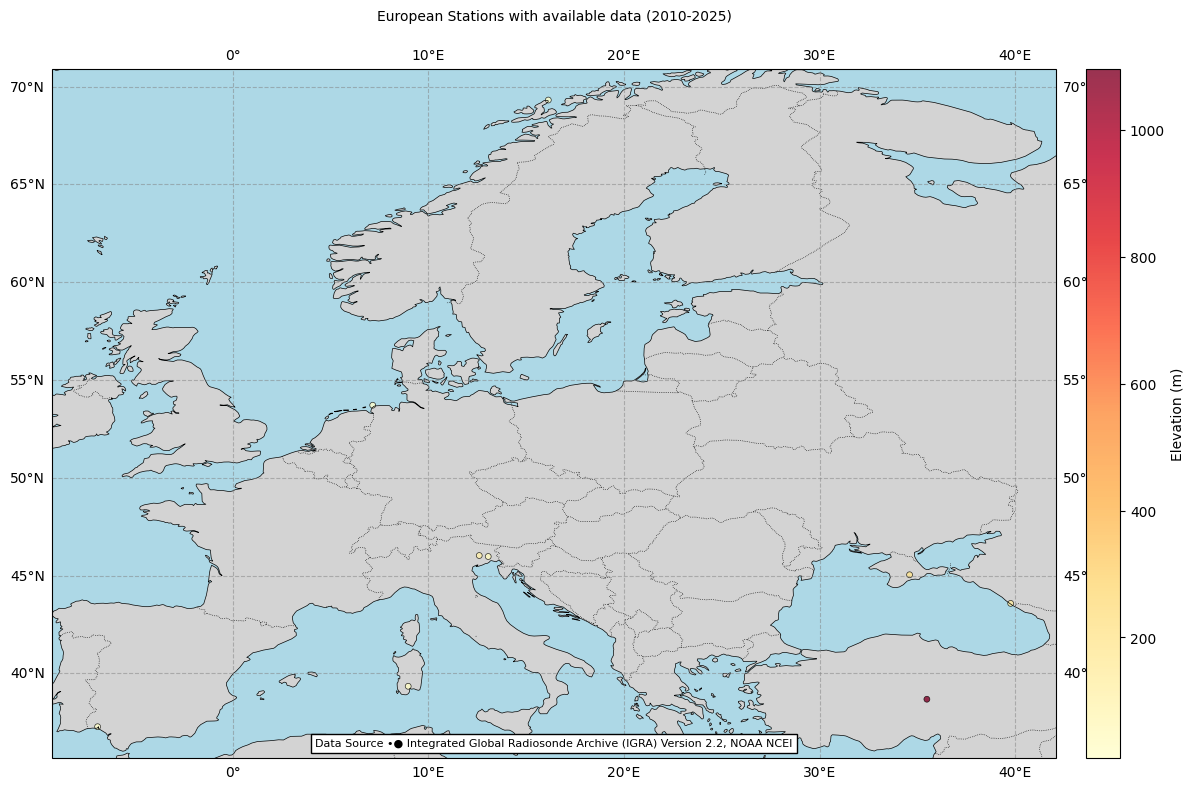

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

# Load the stations data
df = pd.read_csv('data/european_stations_2010_2025.csv')

# Create a figure with a PlateCarree projection
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)

# Plot stations
sc = ax.scatter(df['longitude'], df['latitude'], c=df['elevation'], s=18, cmap='YlOrRd',
                edgecolor='black', linewidth=0.5, alpha=0.8, transform=ccrs.PlateCarree())

# Add a colorbar for elevation
cbar = plt.colorbar(sc, ax=ax, orientation='vertical',
                    pad=0.02, label='Elevation (m)')
cbar.set_label('Elevation (m)', fontsize=10)

# # Annotate a few stations (limit to avoid clutter)
# for idx, row in df.head(5).iterrows():
#     ax.annotate(row['station_name'], (row['longitude'], row['latitude']),
#                 xytext=(5, 5), textcoords='offset points', fontsize=8,
#                 color='orange', transform=ccrs.PlateCarree())

# Set title and data source
plt.title('European Stations with available data (2010-2025)',
          fontsize=10, pad=20, loc='center')
source_text = "Data Source •● Integrated Global Radiosonde Archive (IGRA) Version 2.2, NOAA NCEI"
at = AnchoredText(source_text, loc='lower center',
                  prop=dict(size=8), frameon=True)
ax.add_artist(at)

# Adjust layout and save
plt.tight_layout()
plt.savefig('igra_stations_map_europe.png', dpi=300, bbox_inches='tight')
plt.show()